# Question 1

In [226]:
import pandas as pd

cc = pd.read_csv("D:\\360DigiTMG\\DataScience\\24. Simple Linear Regression\\Assignment Q\\calories_consumed.csv")
cc.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <BarContainer object of 10 artists>)

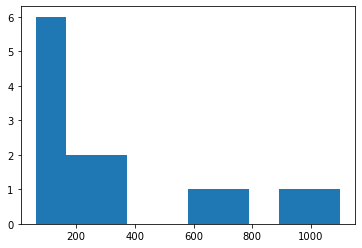

In [227]:
import matplotlib.pyplot as plt

plt.hist(cc['Weight gained (grams)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2667a43f640>,
 'caps': [<matplotlib.lines.Line2D at 0x2667a43fbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2667a43f4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2667a44a1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2667a44a490>],
 'means': []}

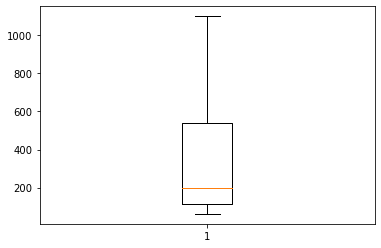

In [228]:
plt.boxplot(cc['Weight gained (grams)'])

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <BarContainer object of 10 artists>)

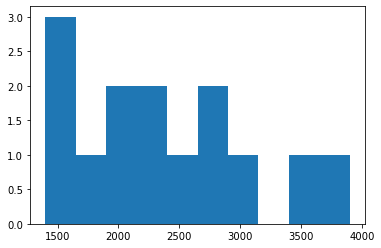

In [229]:
plt.hist(cc['Calories Consumed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2667a50a430>,
 'caps': [<matplotlib.lines.Line2D at 0x2667a50a9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2667a50a280>],
 'medians': [<matplotlib.lines.Line2D at 0x2667a50afa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2667a5172b0>],
 'means': []}

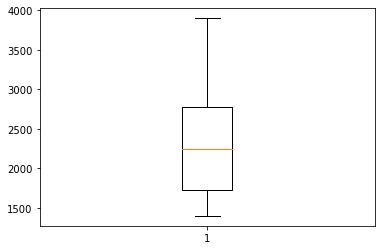

In [230]:
plt.boxplot(cc['Calories Consumed'])

In [231]:
# changing the column name

cc.columns = "weight_gained", "calories_consumed"
cc.head()

,weight_gained,calories_consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([  62,  100,  108,  110,  128,  150,  200,  200,  300,  350,  600,
          700,  900, 1100], dtype=int64)),
 (322.66332324031407, 357.7142857142857, 0.9036888266584125))

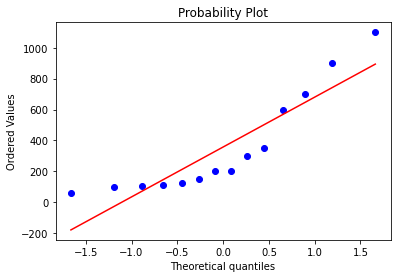

In [232]:
import scipy.stats as stats
import pylab

stats.probplot(cc['weight_gained'], dist="norm", plot=pylab)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([1400, 1500, 1600, 1670, 1900, 1900, 2200, 2300, 2500, 2700, 2800,
         3000, 3400, 3900], dtype=int64)),
 (786.2835439789025, 2340.714285714286, 0.9770434301718469))

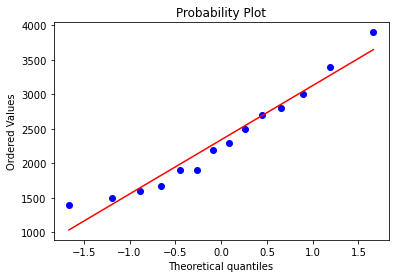

In [233]:
stats.probplot(cc['calories_consumed'], dist="norm", plot=pylab)

In [234]:
import numpy as np
np.corrcoef(cc.weight_gained, cc.calories_consumed)

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [235]:
import statsmodels.formula.api as smf

model1 = smf.ols("calories_consumed ~ weight_gained", data=cc).fit()
model1.summary()

C:\Users\riten\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      calories_consumed   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.86e-07
Time:                        14:55:13   Log-Likelihood:                -96.170
No. Observations:                  14   AIC:                             196.3
Df Residuals:                      12   BIC:                             197.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1577.2007    100.541     15.687      0.000    1358.141    1796.260
weight_gained     2.1344      0.209     10.211      0.000       1.679       2.590
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.425
Skew:                          -0.098   Prob(JB):                        0.808
Kurtosis:                       2.169   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
pred1 = model1.predict(cc.weight_gained)
pred1

0     1807.718381
1     2004.085294
2     3498.181364
3     2004.085294
4     2217.527589
5     1811.987227
6     1850.406841
7     1709.534925
8     2857.854477
9     3925.065955
10    1790.642998
11    1897.364146
12    2324.248737
13    3071.296772
dtype: float64

In [237]:
rmse1 = np.sqrt(np.mean((cc['calories_consumed']-pred1) * (cc['calories_consumed']-pred1)))
rmse1

232.8335007096088

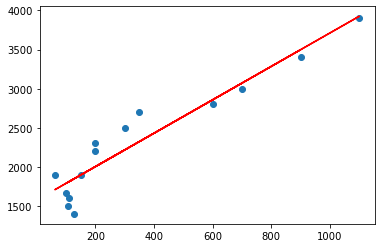

In [238]:
plt.scatter(cc['weight_gained'], cc['calories_consumed'])
plt.plot(cc['weight_gained'], pred1, 'r')
plt.show()

In [239]:
model2 = smf.ols('calories_consumed ~ np.log(weight_gained)', data=cc).fit()
model2.summary()

C:\Users\riten\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      calories_consumed   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     86.04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           8.02e-07
Time:                        14:55:33   Log-Likelihood:                -97.363
No. Observations:                  14   AIC:                             198.7
Df Residuals:                      12   BIC:                             200.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1911.1244    464.188     -4.117      0.001   -2922.503    -899.746
np.log(weight_gained)   774.1735     83.462      9.276      0.000     592.326     956.021
==============================================================================
Omnibus:                        4.026   Durbin-Watson:                   3.009
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                1.659
Skew:                           0.772   Prob(JB):                        0.436
Kurtosis:                       3.679   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
pred2 = model2.predict(cc.weight_gained)
pred2

0     1713.657759
1     2190.692769
2     3355.109707
3     2190.692769
4     2504.593132
5     1727.863176
6     1845.189099
7     1283.993883
8     3041.209345
9     3510.463652
10    1654.076556
11    1967.976918
12    2623.932511
13    3160.548724
dtype: float64

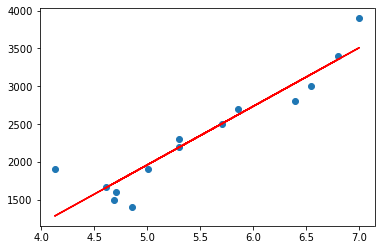

In [241]:
plt.scatter(np.log(cc['weight_gained']), cc['calories_consumed'])
plt.plot(np.log(cc['weight_gained']), pred2, 'r')
plt.show()

In [242]:
rmse2 = np.sqrt(np.mean((cc.calories_consumed - pred2) * (cc.calories_consumed - pred2)))
rmse2

253.5580403936626

In [243]:
model3 = smf.ols("np.log(calories_consumed) ~ weight_gained", data=cc).fit()
model3.summary()

C:\Users\riten\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(calories_consumed)   R-squared:                       0.808
Model:                                   OLS   Adj. R-squared:                  0.792
Method:                        Least Squares   F-statistic:                     50.40
Date:                       Sun, 17 Jul 2022   Prob (F-statistic):           1.25e-05
Time:                               14:55:42   Log-Likelihood:                 8.3130
No. Observations:                         14   AIC:                            -12.63
Df Residuals:                             12   BIC:                            -11.35
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4068      0.058    128.367      0.000       7.281       7.533
weight_gained     0.0009      0.000      7.100      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.488   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.559
Skew:                          -0.317   Prob(JB):                        0.756
Kurtosis:                       2.254   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
pred3 = model3.predict(cc.weight_gained)
pred3_ac = np.exp(pred3)
pred3_ac

0     1805.909334
1     1953.101471
2     3545.194617
3     1953.101471
4     2126.731695
5     1808.988061
6     1836.933870
7     1736.526880
8     2745.847366
9     4203.546672
10    1793.646733
11    1871.676808
12    2219.252162
13    2989.952498
dtype: float64

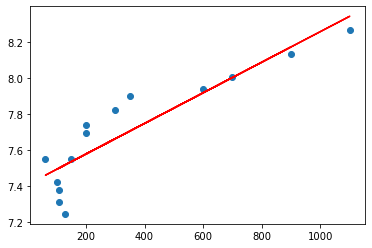

In [245]:
plt.scatter(cc['weight_gained'], np.log(cc['calories_consumed']))
plt.plot(cc['weight_gained'], pred3, 'r')
plt.show()

In [246]:
rmse3 = np.sqrt(np.mean((cc.calories_consumed - pred3_ac) * (cc.calories_consumed - pred3_ac)))
rmse3

272.4207117048494

In [247]:
model4 = smf.ols("calories_consumed ~ weight_gained + I(weight_gained*weight_gained) + I(weight_gained*weight_gained*weight_gained)", data=cc).fit()
model4.summary()

C:\Users\riten\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      calories_consumed   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     44.97
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.11e-06
Time:                        14:56:07   Log-Likelihood:                -93.353
No. Observations:                  14   AIC:                             194.7
Df Residuals:                      10   BIC:                             197.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         1083.9312    239.886      4.519      0.001     549.433    1618.430
weight_gained                                        6.8017      2.164      3.144      0.010       1.981      11.623
I(weight_gained * weight_gained)                    -0.0091      0.005     -2.012      0.072      -0.019       0.001
I(weight_gained * weight_gained * weight_gained)  4.744e-06   2.59e-06      1.832      0.097   -1.03e-06    1.05e-05
==============================================================================
Omnibus:                        1.879   Durbin-Watson:                   2.719
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                0.280
Skew:                           0.016   Prob(JB):                        0.869
Kurtosis:                       3.692   Cond. No.                     1.67e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
pred4_ac = model4.predict(cc['weight_gained'])
# pred4_ac = np.exp(pred4)
pred4_ac

0     1718.822627
1     2119.844562
2     3325.540252
3     2119.844562
4     2437.172632
5     1728.814287
6     1816.068682
7     1471.943774
8     2928.204234
9     3917.891050
10    1678.251906
11    1916.360276
12    2558.132288
13    3033.108872
dtype: float64

In [249]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = cc.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
X

array([[ 108],
       [ 200],
       [ 900],
       [ 200],
       [ 300],
       [ 110],
       [ 128],
       [  62],
       [ 600],
       [1100],
       [ 100],
       [ 150],
       [ 350],
       [ 700]], dtype=int64)

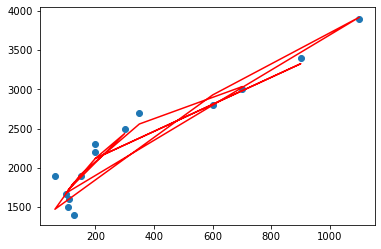

In [250]:
plt.scatter(cc['weight_gained'], cc['calories_consumed'])
plt.plot(cc['weight_gained'], pred4_ac, 'r')
plt.show()

In [251]:
rmse4 = np.sqrt(np.mean((cc.calories_consumed - pred4_ac) * (cc.calories_consumed - pred4_ac)))
rmse4

190.3960093385934

In [261]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(cc, test_size=0.2)
final_model = smf.ols("calories_consumed ~ weight_gained + I(weight_gained*weight_gained) + I(weight_gained*weight_gained*weight_gained)", data=train).fit()
train_predict = final_model.predict(train.weight_gained)
train_rmse = np.sqrt(np.mean((train.calories_consumed - train_predict) * (train.calories_consumed - train_predict)))
train_rmse

130.37457232899942

In [263]:
test_predict = final_model.predict(test.weight_gained)
test_rmse = np.sqrt(np.mean((test.calories_consumed - test_predict) * (test.calories_consumed - test_predict)))
test_rmse

456.6759866300102

# Question 2

In [88]:
import pandas as pd

dt = pd.read_csv("D:\\360DigiTMG\\DataScience\\24. Simple Linear Regression\\Assignment Q\\delivery_time.csv")
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [93]:
dt.columns = "DT", "ST"
dt.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [94]:
import statsmodels.formula.api as smf

model1 = smf.ols("DT ~ ST", data=dt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        22:02:41   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
pred1 = model1.predict(dt.ST)
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

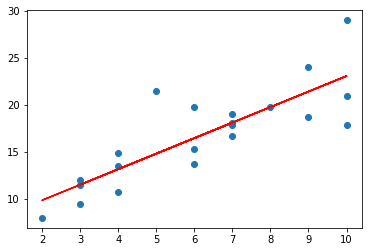

In [97]:
import matplotlib.pyplot as plt

plt.scatter(dt.ST, dt.DT)
plt.plot(dt.ST, pred1, 'r')
plt.show()

In [98]:
import numpy as np

rmse1 = np.sqrt(np.mean((dt.DT - pred1) * (dt.DT - pred1)))
rmse1

2.7916503270617654

In [106]:
model2 = smf.ols('DT ~ np.log(ST)', data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        22:11:08   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
pred2 = model2.predict(dt.ST)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

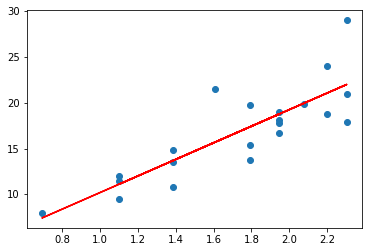

In [108]:
plt.scatter(np.log(dt.ST), dt.DT)
plt.plot(np.log(dt.ST), pred2, 'r')
plt.show()

In [109]:
rmse2 = np.sqrt(np.mean((dt.DT - pred2) * (dt.DT - pred2)))
rmse2

2.733171476682066

In [110]:
model3 = smf.ols("np.log(DT) ~ ST", data=dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           1.59e-06
Time:                        22:11:46   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
pred3 = model3.predict(dt.ST)
pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [112]:
pred3_ac = np.exp(pred3)
pred3_ac

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

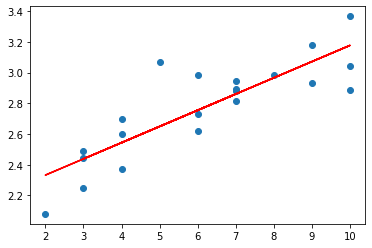

In [114]:
plt.scatter(dt.ST, np.log(dt.DT))
plt.plot(dt.ST, pred3, 'r')
plt.show()

In [116]:
rmse3 = np.sqrt(np.mean((dt.DT - pred3_ac) * (dt.DT - pred3_ac)))
rmse3

2.940250323056201

In [117]:
model4 = smf.ols("np.log(DT) ~ ST + I(ST*ST)", data=dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           2.20e-06
Time:                        22:15:57   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
I(ST * ST)    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
pred4 = model4.predict(dt.ST)
pred4

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [121]:
pred4_ac = np.exp(pred4)
pred4_ac

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

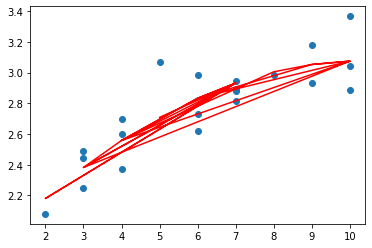

In [123]:
plt.scatter(dt.ST, np.log(dt.DT))
plt.plot(dt.ST, pred4, 'r')
plt.show()

In [124]:
rmse4 = np.sqrt(np.mean((dt.DT - pred4_ac) * (dt.DT - pred4_ac)))
rmse4

2.799041988740925

In [225]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dt, test_size=0.2)

final_model = smf.ols("np.log(DT) ~ ST + I(ST*ST)", data=train).fit()
train_predict = final_model.predict(train.ST)
train_predict_ac = np.exp(train_predict)
train_predict_ac

PatsyError: Error evaluating factor: NameError: name 'DT' is not defined
    np.log(DT) ~ ST + I(ST*ST)
    ^^^^^^^^^^

In [127]:
train_rmse = np.sqrt(np.mean((train.DT - pred4_ac) * (train.DT - pred4_ac)))
train_rmse

2.994607758149185

In [128]:
test_predict = final_model.predict(test.ST)
test_predict_ac = np.exp(test_predict)
test_predict_ac

10    20.191891
8     21.646921
13    10.825502
7     10.825502
11    12.909227
dtype: float64

In [129]:
test_rmse = np.sqrt(np.mean((test.DT - pred4_ac) * (test.DT - pred4_ac)))
test_rmse

2.051562679849348

# Question 3

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab

In [135]:
ed = pd.read_csv("D:\\360DigiTMG\\DataScience\\24. Simple Linear Regression\\Assignment Q\\emp_data.csv")
ed.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [136]:
ed.columns = "SH", "CR"
ed.head()

,SH,CR
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [137]:
np.corrcoef(ed.SH, ed.CR)

array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

In [138]:
model1 = smf.ols("CR ~ SH", data=ed).fit()
model1.summary()

C:\Users\riten\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CR   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           0.000239
Time:                        23:53:16   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.3649     27.352      8.934      0.000     181.291     307.439
SH            -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
pred1 = model1.predict(ed.SH)
pred1

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

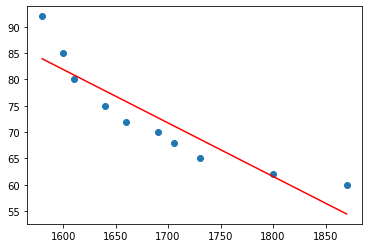

In [140]:
plt.scatter(ed.SH, ed.CR)
plt.plot(ed.SH, pred1, "r")
plt.show()

In [141]:
rmse1 = np.sqrt(np.mean((ed.CR - pred1) * (ed.CR - pred1)))
rmse1

3.997528462337793

In [142]:
model2 = smf.ols('CR ~ np.log(SH)', data=ed).fit()
model2.summary()

C:\Users\riten\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CR   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           0.000153
Time:                        00:16:04   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(SH)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
pred2 = model2.predict(ed.SH)
pred2

0    84.376270
1    82.161024
2    81.063764
3    77.812415
4    75.677725
5    72.523437
6    70.863969
7    68.403723
8    61.418285
9    54.699388
dtype: float64

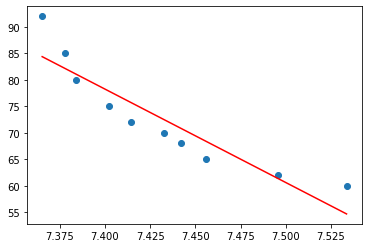

In [145]:
plt.scatter(np.log(ed.SH), ed.CR)
plt.plot(np.log(ed.SH), pred2, 'r')
plt.show()

In [146]:
rmse2 = np.sqrt(np.mean((ed.CR - pred2) * (ed.CR - pred2)))
rmse2

3.7860036130227708

In [147]:
model3 = smf.ols("np.log(CR) ~ SH", data=ed).fit()
model3.summary()

C:\Users\riten\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(CR)   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     55.26
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           7.38e-05
Time:                        00:23:07   Log-Likelihood:                 16.511
No. Observations:                  10   AIC:                            -29.02
Df Residuals:                       8   BIC:                            -28.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6383      0.318     20.902      0.000       5.906       7.371
SH            -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
pred3 = model3.predict(ed.SH)
pred3

0    4.432091
1    4.404164
2    4.390201
3    4.348311
4    4.320384
5    4.278494
6    4.256153
7    4.222641
8    4.124897
9    4.027154
dtype: float64

In [149]:
pred3_ac = np.exp(pred3)
pred3_ac

0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64

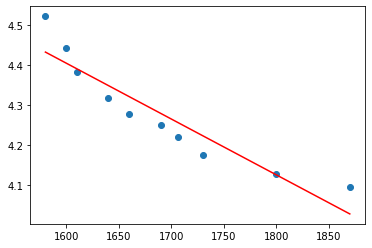

In [150]:
plt.scatter(ed.SH, np.log(ed.CR))
plt.plot(ed.SH, pred3, 'r')
plt.show()

In [152]:
rmse3 = np.sqrt(np.mean((ed.CR - pred3_ac) * (ed.CR - pred3_ac)))
rmse3

3.5415493188215756

In [154]:
model4 = smf.ols("CR ~ SH + I(SH * SH)", data=ed).fit()
model4.summary()

C:\Users\riten\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CR   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     129.6
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.95e-06
Time:                        00:32:20   Log-Likelihood:                -18.751
No. Observations:                  10   AIC:                             43.50
Df Residuals:                       7   BIC:                             44.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1647.0116    228.059      7.222      0.000    1107.738    2186.285
SH            -1.7371      0.266     -6.538      0.000      -2.365      -1.109
I(SH * SH)     0.0005   7.72e-05      6.158      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.362
Skew:                           0.028   Prob(JB):                        0.835
Kurtosis:                       2.070   Cond. No.                     1.10e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
pred4 = model4.predict(ed.SH)
pred4

0    89.170352
1    84.663268
2    82.552343
3    76.790034
4    73.423882
5    69.087738
6    67.125013
7    64.637299
8    60.509521
9    61.040550
dtype: float64

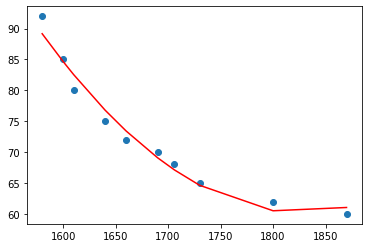

In [156]:
plt.scatter(ed.SH, ed.CR)
plt.plot(ed.SH, pred4, 'r')
plt.show()

In [157]:
rmse4 = np.sqrt(np.mean((ed.CR - pred4) * (ed.CR - pred4)))
rmse4

1.5779753028677412

In [224]:
train, test = train_test_split(ed, test_size=0.2)
final_model = smf.ols("CR ~ SH + I(SH * SH)", data=train).fit()
train_predict = final_model.predict(train.SH)
train_rmse = np.sqrt(np.mean((train.CR - train_predict) * (train.CR - train_predict)))
train_rmse

1.3942136492445045

In [165]:
test_predict = final_model.predict(test.SH)
test_rmse = np.sqrt(np.mean((test.CR - test_predict) * (test.CR - test_predict)))
test_rmse

1.4206412023384711

# Question 4

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab

In [168]:
sd = pd.read_csv("D:\\360DigiTMG\\DataScience\\24. Simple Linear Regression\\Assignment Q\\Salary_Data.csv")
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [169]:
sd.columns = "YE", "SA"
sd.head()

,YE,SA
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [171]:
np.corrcoef(sd.YE, sd.SA)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [173]:
model1 = smf.ols('SA ~ YE', data=sd).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SA   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        01:50:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
pred1 = model1.predict(sd.YE)
pred1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

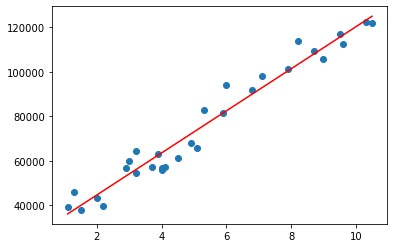

In [176]:
plt.scatter(sd.YE, sd.SA)
plt.plot(sd.YE, pred1, 'r')
plt.show()

In [178]:
rmse1 = np.sqrt(np.mean((sd.SA - pred1) * (sd.SA - pred1)))
rmse1

5592.043608760661

In [179]:
model2 = smf.ols("SA ~ np.log(YE)", data=sd).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SA   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           3.25e-13
Time:                        03:17:47   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YE)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
pred2 = model2.predict(sd.YE)
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

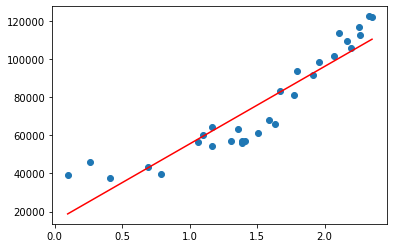

In [181]:
plt.scatter(np.log(sd.YE), sd.SA)
plt.plot(np.log(sd.YE), pred2, 'r')
plt.show()

In [183]:
rmse2 = np.sqrt(np.mean((sd.SA - pred2) * (sd.SA - pred2)))
rmse2

10302.893706228308

In [184]:
model3 = smf.ols("np.log(SA) ~ YE", data=sd).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(SA)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           7.03e-18
Time:                        03:22:05   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YE             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
pred3 = model3.predict(sd.YE)
pred3

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

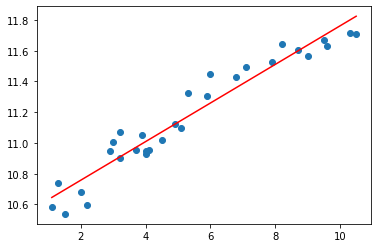

In [187]:
plt.scatter(sd.YE, np.log(sd.SA))
plt.plot(sd.YE, pred3, 'r')
plt.show()

In [188]:
rmse3 = np.sqrt(np.mean((sd.SA - np.exp(pred3)) * (sd.SA - np.exp(pred3))))
rmse3

7213.235076620129

In [222]:
train, test = train_test_split(sd, test_size=0.2)
final_model = smf.ols("np.log(SA) ~ YE", data=train).fit()
train_pred = final_model.predict(train.YE)
rmse_train = np.sqrt(np.mean((train.YE - train_pred) * (train.YE - train_pred)))
rmse_train

6.441126878876618

In [223]:
test_pred = final_model.predict(test.YE)
rmse_test = np.sqrt(np.mean((test.YE - test_pred) * (test.YE - test_pred)))
rmse_test

5.866075552737292

# Question 5

In [194]:
sg = pd.read_csv("D:\\360DigiTMG\\DataScience\\24. Simple Linear Regression\\Assignment Q\\SAT_GPA.csv")
sg.head()

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6


In [195]:
sg.columns = "SS", "GP"

In [196]:
np.corrcoef(sg.SS, sg.GP)

array([[1.        , 0.29353828],
       [0.29353828, 1.        ]])

In [199]:
model1 = smf.ols("GP ~ SS", data=sg).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GP   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           2.46e-05
Time:                        03:32:09   Log-Likelihood:                -151.44
No. Observations:                 200   AIC:                             306.9
Df Residuals:                     198   BIC:                             313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4029      0.110     21.908      0.000       2.187       2.619
SS             0.0009      0.000      4.321      0.000       0.000       0.001
==============================================================================
Omnibus:                       12.519   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.558
Skew:                           0.317   Prob(JB):                       0.0228
Kurtosis:                       2.290   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
pred1 = model1.predict(sg.SS)
pred1

0      2.589947
1      2.597212
2      3.054002
3      2.929588
4      2.769757
         ...   
195    2.865111
196    2.826061
197    3.014044
198    3.075797
199    2.638078
Length: 200, dtype: float64

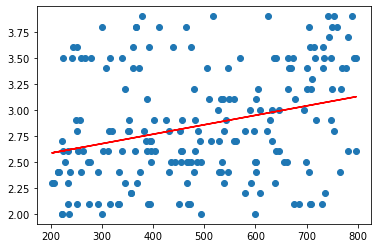

In [202]:
plt.scatter(sg.SS, sg.GP)
plt.plot(sg.SS, pred1, 'r')
plt.show()

In [203]:
rmse1 = np.sqrt(np.mean((sg.SS - pred1) * (sg.SS - pred1)))
rmse1

519.0973239672992

In [215]:
model2 = smf.ols("np.log(GP) ~ SS + I(SS * SS) + I(SS * SS * SS) + I(SS * SS * SS * SS)", data=sg).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(GP)   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     6.728
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.30e-05
Time:                        03:37:42   Log-Likelihood:                 62.497
No. Observations:                 200   AIC:                            -115.0
Df Residuals:                     195   BIC:                            -98.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6608      0.985     -0.671      0.503      -2.604       1.282
SS                       0.0141      0.009      1.527      0.128      -0.004       0.032
I(SS * SS)           -4.225e-05   3.06e-05     -1.380      0.169      -0.000    1.81e-05
I(SS * SS * SS)       5.264e-08   4.27e-08      1.233      0.219   -3.16e-08    1.37e-07
I(SS * SS * SS * SS) -2.284e-11   2.13e-11     -1.071      0.286   -6.49e-11    1.92e-11
==============================================================================
Omnibus:                        7.661   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.817
Skew:                          -0.030   Prob(JB):                        0.148
Kurtosis:                       2.326   Cond. No.                     1.20e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
pred2 = model2.predict(sg.SS)
pred2

0      0.876096
1      0.896133
2      1.118341
3      1.008583
4      1.014789
         ...   
195    0.994511
196    0.999286
197    1.073904
198    1.143803
199    0.976546
Length: 200, dtype: float64

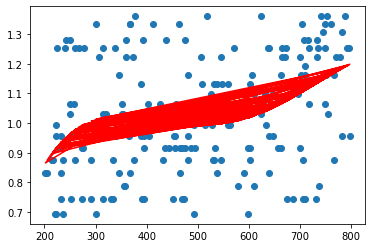

In [217]:
plt.scatter(sg.SS, np.log(sg.GP))
plt.plot(sg.SS, pred2, 'r')
plt.show()

In [219]:
rmse2 = np.sqrt(np.mean((sg.GP - np.exp(pred2)) * (sg.GP - np.exp(pred2))))
rmse2

0.5061820299388873

In [220]:
train, test = train_test_split(sg, test_size=0.2)
final_model = smf.ols("np.log(GP) ~ SS + I(SS * SS) + I(SS * SS * SS) + I(SS * SS * SS * SS)", data=train).fit()
train_pred = final_model.predict(train.SS)
train_rmse = np.sqrt(np.mean((train.GP - train_pred) * (train.GP - train_pred)))
train_rmse

1.9132182852634285

In [221]:
test_pred = final_model.predict(test.SS)
test_rmse = np.sqrt(np.mean((test.GP - test_pred) * (test.GP - test_pred)))
test_rmse

1.7572246578729283